In [6]:
from IPython.core.display import SVG, display
from rdkit import Chem
from rdkit.Chem import AllChem
from molNet.utils.identifier2smiles import multicheck
from molNet.utils.mol.draw import mol_to_svg

In [ ]:
#ns = multicheck("poly(vinyl stearate)")
#ns = multicheck("Poly(6-O-vinyl-2-O-acryl-ascorbic acid)")

ns = multicheck("Poly(2-O-acryl-ascorbic acid)")
print(ns)
mol = Chem.MolFromSmiles(list(ns.keys())[0])
mol

In [2]:
ns = multicheck("2-O-acryl-ascorbic acid")
ns




{'C=CC(=O)OC1=C(O)[C@@H]([C@@H](O)CO)OC1=O': {'count': 1, 'by': ['opsin']}}

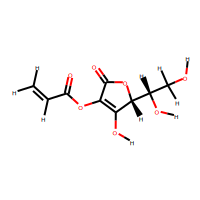

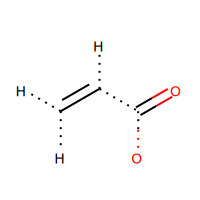

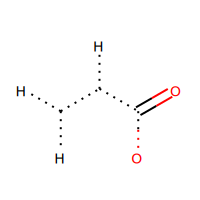

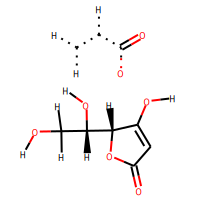

In [20]:
aas_smiles = 'C=CC(=O)OC1=C(O)[C@@H]([C@@H](O)CO)OC1=O'
aas=Chem.AddHs(Chem.MolFromSmiles(aas_smiles))
display(SVG(mol_to_svg(aas)))

monomer_smarts="[C]([H])([H])=[C]([H])(C(=O)O)"
monomer_mol = Chem.MolFromSmarts(monomer_smarts)
display(SVG(mol_to_svg(monomer_mol)))

polymer_smarts="[C]([H])([H])[C]([H])(C(=O)O)"
polymer_mol = Chem.MolFromSmarts(polymer_smarts)
display(SVG(mol_to_svg(polymer_mol)))

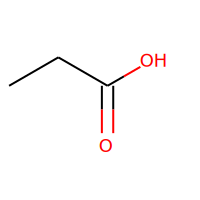

0

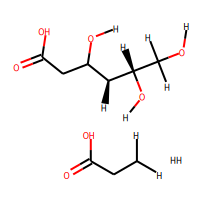

1

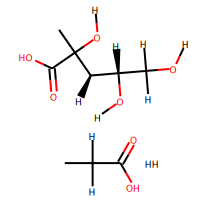

2

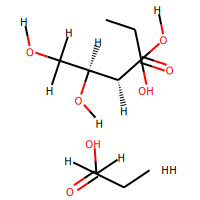

3

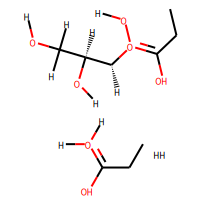

4

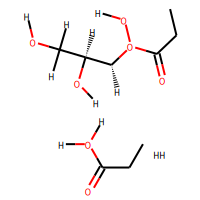

In [30]:
display(SVG(mol_to_svg(Chem.MolFromSmiles(Chem.MolToSmiles(polymer_mol)))))
for i in range(40):
    try:
        mod_mol = Chem.ReplaceSubstructs(aas,
                                                 Chem.MolFromSmiles(Chem.MolToSmiles(monomer_mol)),
                                                 Chem.MolFromSmiles(Chem.MolToSmiles(polymer_mol)),
                                                 replacementConnectionPoint=i,
                                                 replaceAll=True)[0]
        display(i)
        display(SVG(mol_to_svg(mod_mol)))
    except:
        pass